In [1]:
from IPython.display import display, HTML

In [3]:
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 9999999999)

In [6]:
import numpy as np

In [7]:
import plotly.express as px

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
import matplotlib as mpl

In [12]:
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
from sklearn import preprocessing, model_selection, metrics, feature_selection

In [15]:
from sklearn import metrics

In [16]:
from sklearn.model_selection import GridSearchCV, learning_curve

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.svm import SVC, LinearSVC

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.feature_selection import f_classif

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import KFold

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Activation,Conv1D,LSTM,Flatten

In [31]:
from tensorflow.keras.layers import Dense, Conv1D,LSTM,Flatten

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
from tensorflow.keras.utils import to_categorical, plot_model

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
import glob

In [36]:
import os

In [37]:
data_df_list = []

In [38]:
rows=None

In [39]:
excel_file = "Datasets/Feature_Names.csv"
column_labels = pd.read_csv(excel_file, header=None).squeeze().tolist()

In [40]:
for file in glob.glob("Datasets/data_attack/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows, header=None)
    tmp_df.columns = column_labels
    tmp_df["target"] = "data-" + os.path.splitext(os.path.basename(file))[0]
    data_df_list.append(tmp_df)

In [ ]:
for file in glob.glob("Datasets/data_attack/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows, header=None)
    tmp_df.columns = column_labels
    tmp_df["target"] = "data-" + os.path.splitext(os.path.basename(file))[0]
    
    # Remove non-numeric columns
    tmp_df = tmp_df.select_dtypes(include=[int, float])
    
    data_df_list.append(tmp_df)

In [41]:
data_df_list[0].head()

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,7000001,1528082388,17608.0,80.0,9,822,1528082439,39416,51.364681,0.159031,0.007054,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
1,7000002,1528082388,17609.0,80.0,9,822,1528082439,39417,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
2,7000003,1528082388,17612.0,80.0,9,822,1528082439,39418,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
3,7000004,1528082388,17613.0,80.0,9,822,1528082439,39419,51.404530,0.172313,0.011739,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
4,7000005,1528082388,17618.0,80.0,9,822,1528082439,39420,51.404530,0.172313,0.011741,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8


In [42]:
data_df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   pkSeqID  1000000 non-null  int64  
 1   stime    1000000 non-null  int64  
 2   sport    999974 non-null   float64
 3   dport    999974 non-null   float64
 4   pkts     1000000 non-null  int64  
 5   bytes    1000000 non-null  int64  
 6   ltime    1000000 non-null  int64  
 7   seq      1000000 non-null  int64  
 8   dur      1000000 non-null  float64
 9   mean     1000000 non-null  float64
 10  stddev   1000000 non-null  float64
 11  sum      1000000 non-null  float64
 12  min      1000000 non-null  float64
 13  max      1000000 non-null  float64
 14  spkts    1000000 non-null  int64  
 15  dpkts    1000000 non-null  int64  
 16  sbytes   1000000 non-null  int64  
 17  dbytes   1000000 non-null  int64  
 18  rate     1000000 non-null  float64
 19  srate    1000000 non-null  float64
 20  dra

In [43]:
data_df_list[0].columns

Index(['pkSeqID', 'stime', 'sport', 'dport', 'pkts', 'bytes', 'ltime', 'seq',
       'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack', 'target'],
      dtype='object')

In [44]:
iot_df_list = []

In [45]:
for file in glob.glob("Datasets/iot_attack/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows)
    tmp_df.columns = column_labels
    tmp_df["target"] = "iot-"+ os.path.splitext(os.path.basename(file))[0]
    iot_df_list.append(tmp_df)

In [46]:
iot_df_list[0].head()

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,2164098,1528081357,2158.0,80.0,5,770,1528081386,42028,29.444118,1.171181,2.028545,4.684725,0.0,4.684725,5,0,770,0,0.135851,0.135851,0.0,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
1,2164099,1528081357,2159.0,80.0,5,770,1528081386,42029,29.444118,1.171181,2.028545,4.684725,0.0,4.684725,5,0,770,0,0.135851,0.135851,0.0,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
2,2164100,1528081357,2160.0,80.0,5,770,1528081386,42030,29.444118,1.171181,2.028545,4.684725,0.0,4.684725,5,0,770,0,0.135851,0.135851,0.0,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
3,2164101,1528081357,2161.0,80.0,5,770,1528081386,42031,29.444118,1.171181,2.028545,4.684725,0.0,4.684725,5,0,770,0,0.135851,0.135851,0.0,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
4,2164102,1528081357,2164.0,80.0,5,770,1528081386,42032,29.444118,1.171181,2.028545,4.684725,0.0,4.684725,5,0,770,0,0.135851,0.135851,0.0,1,iot-UNSW_2018_IoT_Botnet_Dataset_3


In [47]:
df_list = data_df_list + iot_df_list

In [48]:
df = pd.concat(df_list)

In [49]:
df.head()

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,7000001,1528082388,17608.0,80.0,9,822,1528082439,39416,51.364681,0.159031,0.007054,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
1,7000002,1528082388,17609.0,80.0,9,822,1528082439,39417,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
2,7000003,1528082388,17612.0,80.0,9,822,1528082439,39418,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
3,7000004,1528082388,17613.0,80.0,9,822,1528082439,39419,51.404530,0.172313,0.011739,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
4,7000005,1528082388,17618.0,80.0,9,822,1528082439,39420,51.404530,0.172313,0.011741,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1835903 entries, 0 to 835902
Data columns (total 23 columns):
 #   Column   Dtype  
---  ------   -----  
 0   pkSeqID  int64  
 1   stime    int64  
 2   sport    float64
 3   dport    float64
 4   pkts     int64  
 5   bytes    int64  
 6   ltime    int64  
 7   seq      int64  
 8   dur      float64
 9   mean     float64
 10  stddev   float64
 11  sum      float64
 12  min      float64
 13  max      float64
 14  spkts    int64  
 15  dpkts    int64  
 16  sbytes   int64  
 17  dbytes   int64  
 18  rate     float64
 19  srate    float64
 20  drate    float64
 21  attack   int64  
 22  target   object 
dtypes: float64(11), int64(11), object(1)
memory usage: 336.2+ MB


In [51]:
df.describe()

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
count,1.835903e+06,1.835903e+06,1.835856e+06,1.835856e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06,1.835903e+06
mean,5.260813e+06,1.528082e+09,3.304120e+04,1.112713e+02,5.334053e+00,7.670074e+02,1.528082e+09,1.311061e+05,3.924967e+01,1.970954e-01,2.299726e-01,6.714904e-01,3.308771e-02,5.588303e-01,4.411846e+00,9.222072e-01,6.829131e+02,8.409432e+01,3.360311e-01,1.987156e-01,7.547369e-02,9.999591e-01
std,2.463770e+06,5.328689e+02,1.890794e+04,1.172756e+03,2.853000e+01,2.687816e+04,5.346053e+02,7.411153e+04,1.182854e+01,4.477899e-01,5.888267e-01,1.615024e+00,6.087936e-02,1.330265e+00,1.898842e+01,1.232358e+01,1.710760e+04,1.199423e+04,1.689069e+00,8.737041e-01,6.150616e+01,6.391415e-03
min,2.164098e+06,1.528081e+09,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.528081e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.623074e+06,1.528081e+09,1.670700e+04,8.000000e+01,4.000000e+00,5.220000e+02,1.528081e+09,6.755300e+04,2.943791e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.620000e+02,0.000000e+00,7.282000e-02,5.384100e-02,0.000000e+00,1.000000e+00
50%,7.082049e+06,1.528082e+09,3.355700e+04,8.000000e+01,5.000000e+00,6.160000e+02,1.528082e+09,1.297100e+05,4.069354e+01,1.549900e-02,1.267000e-02,4.727200e-02,0.000000e+00,4.628900e-02,4.000000e+00,1.000000e+00,6.160000e+02,6.000000e+01,9.554700e-02,9.184100e-02,0.000000e+00,1.000000e+00
75%,7.541024e+06,1.528083e+09,4.929100e+04,8.000000e+01,6.000000e+00,8.220000e+02,1.528083e+09,1.952780e+05,4.943687e+01,1.491005e-01,2.422200e-02,3.185230e-01,0.000000e+00,1.675960e-01,5.000000e+00,2.000000e+00,7.700000e+02,1.200000e+02,1.596730e-01,1.158380e-01,3.677200e-02,1.000000e+00
max,8.000000e+06,1.528083e+09,6.553500e+04,6.462700e+04,1.011200e+04,9.853151e+06,1.528083e+09,2.621770e+05,6.346957e+01,4.937043e+00,2.490170e+00,6.328055e+01,4.343017e+00,4.999860e+00,5.056000e+03,5.056000e+03,5.085663e+06,5.034928e+06,3.981949e+02,2.654632e+02,8.333333e+04,1.000000e+00


In [52]:
ds_shape = df.shape

In [53]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Rows Available in Dataset <b>{0}</b></h6>".format(ds_shape[0])))
display(HTML("<h6 class='messagebox messagelightgreen'>No of Columns Available in Dataset <b>{0}</b></h6>".format(ds_shape[1])))

In [54]:
target_counts = df["target"].value_counts()

In [55]:
target_counts

target
data-UNSW_2018_IoT_Botnet_Dataset_8    1000000
iot-UNSW_2018_IoT_Botnet_Dataset_3      835903
Name: count, dtype: int64

In [56]:
def display_bar_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.bar(data, x=xvalues, y=yvalues, color=xvalues, text_auto=True, color_continuous_scale = 'algae')
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [57]:
def display_pie_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.pie(data, names=xvalues, values=yvalues, color=xvalues)
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [58]:
target_counts.index

Index(['data-UNSW_2018_IoT_Botnet_Dataset_8', 'iot-UNSW_2018_IoT_Botnet_Dataset_3'], dtype='object', name='target')

In [59]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(target_counts, target_counts.index, target_counts.values, 
                  "Target wise count", "IoT BoT Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [60]:
df.isnull().sum().sort_values()

pkSeqID     0
drate       0
srate       0
rate        0
dbytes      0
sbytes      0
dpkts       0
spkts       0
max         0
min         0
attack      0
sum         0
mean        0
dur         0
seq         0
ltime       0
bytes       0
pkts        0
stime       0
stddev      0
target      0
dport      47
sport      47
dtype: int64

In [61]:
display(HTML("<h6 class='messagebox messagebrown'><b>No</b> Missing Values are Available in Dataset</h6>"))

In [62]:
duplicated_rows = df.duplicated().sum()

In [63]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
duplicated_rows = df.duplicated().sum()

In [66]:
display(HTML("<h6 class='messagebox messagebrown'>There are {0} Duplicated Rows Available in Dataset</h6>".format(duplicated_rows)))

In [67]:
counts = df.nunique()

In [68]:
counts

pkSeqID    1835903
stime          207
sport        65536
dport         1472
pkts            62
bytes          149
ltime          224
seq         262177
dur         344990
mean        193920
stddev      152868
sum         396606
min          81524
max         232138
spkts           50
dpkts           29
sbytes         119
dbytes          53
rate         69473
srate        36872
drate        19322
attack           2
target           2
dtype: int64

In [69]:
binary_opt1_df = df.copy()

In [70]:
binary_opt1_df

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,7000001,1528082388,17608.0,80.0,9,822,1528082439,39416,51.364681,0.159031,0.007054,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
1,7000002,1528082388,17609.0,80.0,9,822,1528082439,39417,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
2,7000003,1528082388,17612.0,80.0,9,822,1528082439,39418,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
3,7000004,1528082388,17613.0,80.0,9,822,1528082439,39419,51.404530,0.172313,0.011739,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
4,7000005,1528082388,17618.0,80.0,9,822,1528082439,39420,51.404530,0.172313,0.011741,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835898,2999996,1528081524,54908.0,80.0,3,462,1528081566,91424,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835899,2999997,1528081524,54909.0,80.0,3,462,1528081566,91425,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835900,2999998,1528081524,54914.0,80.0,3,462,1528081566,91426,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835901,2999999,1528081524,54915.0,80.0,3,462,1528081566,91427,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3


In [71]:
binary_opt1_df["target"].replace(regex=r'^attack-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [72]:
binary_opt1_df

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,7000001,1528082388,17608.0,80.0,9,822,1528082439,39416,51.364681,0.159031,0.007054,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
1,7000002,1528082388,17609.0,80.0,9,822,1528082439,39417,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
2,7000003,1528082388,17612.0,80.0,9,822,1528082439,39418,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,data-UNSW_2018_IoT_Botnet_Dataset_8
3,7000004,1528082388,17613.0,80.0,9,822,1528082439,39419,51.404530,0.172313,0.011739,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
4,7000005,1528082388,17618.0,80.0,9,822,1528082439,39420,51.404530,0.172313,0.011741,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907,1,data-UNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835898,2999996,1528081524,54908.0,80.0,3,462,1528081566,91424,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835899,2999997,1528081524,54909.0,80.0,3,462,1528081566,91425,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835900,2999998,1528081524,54914.0,80.0,3,462,1528081566,91426,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835901,2999999,1528081524,54915.0,80.0,3,462,1528081566,91427,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3


In [73]:
binary_opt1_df["target"].replace(regex=r'^data-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [74]:
binary_opt1_df

,pkSeqID,stime,sport,dport,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,target
0,7000001,1528082388,17608.0,80.0,9,822,1528082439,39416,51.364681,0.159031,0.007054,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937,1,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
1,7000002,1528082388,17609.0,80.0,9,822,1528082439,39417,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
2,7000003,1528082388,17612.0,80.0,9,822,1528082439,39418,51.364681,0.159031,0.007054,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937,1,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
3,7000004,1528082388,17613.0,80.0,9,822,1528082439,39419,51.404530,0.172313,0.011739,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907,1,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
4,7000005,1528082388,17618.0,80.0,9,822,1528082439,39420,51.404530,0.172313,0.011741,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907,1,IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835898,2999996,1528081524,54908.0,80.0,3,462,1528081566,91424,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835899,2999997,1528081524,54909.0,80.0,3,462,1528081566,91425,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835900,2999998,1528081524,54914.0,80.0,3,462,1528081566,91426,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3
835901,2999999,1528081524,54915.0,80.0,3,462,1528081566,91427,42.664722,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000,1,iot-UNSW_2018_IoT_Botnet_Dataset_3


In [75]:
binary_target_counts = binary_opt1_df["target"].value_counts()

In [67]:
1000000 + 999999

1999999

In [68]:
1000000 / 1999999

0.500000250000125

In [76]:
binary_target_counts

target
IoT-Bot-AttackUNSW_2018_IoT_Botnet_Dataset_8    1000000
iot-UNSW_2018_IoT_Botnet_Dataset_3               835903
Name: count, dtype: int64

In [77]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(binary_target_counts, binary_target_counts.index, binary_target_counts.values, 
                  "Binary Classification. Option 1: Target wise count", "Traffic Information", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [78]:
main_attack_opt2_df = df.copy()

In [79]:
main_attack_opt2_df["target"].replace(regex=r'^data-[a-z]*', value='data', inplace=True)

In [80]:
main_attack_opt2_df["target"].replace(regex=r'^attack-[a-z]*', value='attack', inplace=True)

In [81]:
main_attack_target_counts = main_attack_opt2_df["target"].value_counts()

In [82]:
main_attack_target_counts

target
dataUNSW_2018_IoT_Botnet_Dataset_8    1000000
iot-UNSW_2018_IoT_Botnet_Dataset_3     835903
Name: count, dtype: int64

In [83]:
display_bar_chart(main_attack_target_counts, main_attack_target_counts.index, main_attack_target_counts.values, 
                  "Multi Class Classification. Option 2: IoT BoT Main Attack Target wise count", 
                  "IoT BoT Main Attack Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [88]:
sub_attack_opt3_df = df.copy()

In [89]:
sub_attack_target_counts = sub_attack_opt3_df["target"].value_counts()

In [90]:
sub_attack_target_counts

target
data-UNSW_2018_IoT_Botnet_Dataset_8    1000000
iot-UNSW_2018_IoT_Botnet_Dataset_3      835903
Name: count, dtype: int64

In [91]:
display_bar_chart(sub_attack_target_counts, sub_attack_target_counts.index, sub_attack_target_counts.values, 
                  "Multi Class Classification. Option 3: IoT BoT Sub Attack Target wise count", 
                  "IoT BoT Sub Attack Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [92]:
del df

In [93]:
class MyClassifiers:
    def __init__(self, data_frame):
        self.data_frame = data_frame

In [94]:
labelencoder = LabelEncoder()

In [95]:
sub_attack_opt3_df['target'] = labelencoder.fit_transform(sub_attack_opt3_df['target'])

In [96]:
labelencoder.classes_

array(['data-UNSW_2018_IoT_Botnet_Dataset_8',
       'iot-UNSW_2018_IoT_Botnet_Dataset_3'], dtype=object)

In [97]:
y = sub_attack_opt3_df["target"]

In [98]:
X = sub_attack_opt3_df.drop(["target"], axis=1)

In [95]:
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [101]:
scaler.fit(X)

MinMaxScaler()

In [102]:
X = scaler.transform(X)

In [103]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_imputed = imputer.fit_transform(X)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [116]:
from sklearn.feature_selection import SelectKBest

In [117]:
from sklearn.feature_selection import f_classif

In [118]:
select_feature = SelectKBest(f_classif, k=25).fit(X_imputed, y)

In [ ]:
select_feature = SelectKBest(f_classif, k=25).fit(X, y)

In [119]:
print('Score list:', select_feature.scores_)

Score list: [1.53154498e+08 1.41982678e+08 9.24432319e+02 5.26819880e+01
 1.35945824e+01 1.51197921e+00 1.28909936e+08 4.09757309e+03
 2.52734930e+04 1.93818675e+04 3.52916638e+04 3.42372226e+04
 7.15265468e+01 3.77362475e+04 4.14582528e+01 1.91848318e+00
 3.16515997e+00 4.75016997e-02 4.03582684e+04 3.92011393e+04
 1.57218585e+00 1.03161188e+01]


In [120]:
x_train.shape

(1285132, 22)

In [121]:
fs = SelectKBest(f_classif, k=20)

In [122]:
fs.fit(x_train, y_train)

SelectKBest(k=20)

In [123]:
x_train_fs = fs.transform(x_train)

In [124]:
x_train_fs.shape

(1285132, 20)

In [125]:
x_test_fs = fs.transform(x_test)

In [126]:
x_test_fs.shape

(550771, 20)

In [127]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 107318694.476113
Feature 1: 99476909.509772
Feature 2: 639.798047
Feature 3: 34.581111
Feature 4: 12.904022
Feature 5: 2.176001
Feature 6: 90297817.772585
Feature 7: 2927.568650
Feature 8: 17657.234068
Feature 9: 13509.832899
Feature 10: 24658.401483
Feature 11: 24004.995818
Feature 12: 40.085567
Feature 13: 26372.629750
Feature 14: 36.559244
Feature 15: 0.613983
Feature 16: 3.804440
Feature 17: 0.328005
Feature 18: 27921.151707
Feature 19: 27081.889980
Feature 20: 1.329283
Feature 21: 12.071753


In [128]:
lr_cls = LogisticRegression(solver='liblinear')

In [129]:
lr_cls.fit(x_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [130]:
yhat = lr_cls.predict(x_test_fs)

In [131]:
lr_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (lr_accuracy))

Accuracy: 100.00


In [132]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                                     precision    recall  f1-score   support

data-UNSW_2018_IoT_Botnet_Dataset_8       1.00      1.00      1.00    300000
 iot-UNSW_2018_IoT_Botnet_Dataset_3       1.00      1.00      1.00    250771

                           accuracy                           1.00    550771
                          macro avg       1.00      1.00      1.00    550771
                       weighted avg       1.00      1.00      1.00    550771



In [133]:
cm_fig_size = (17,15)

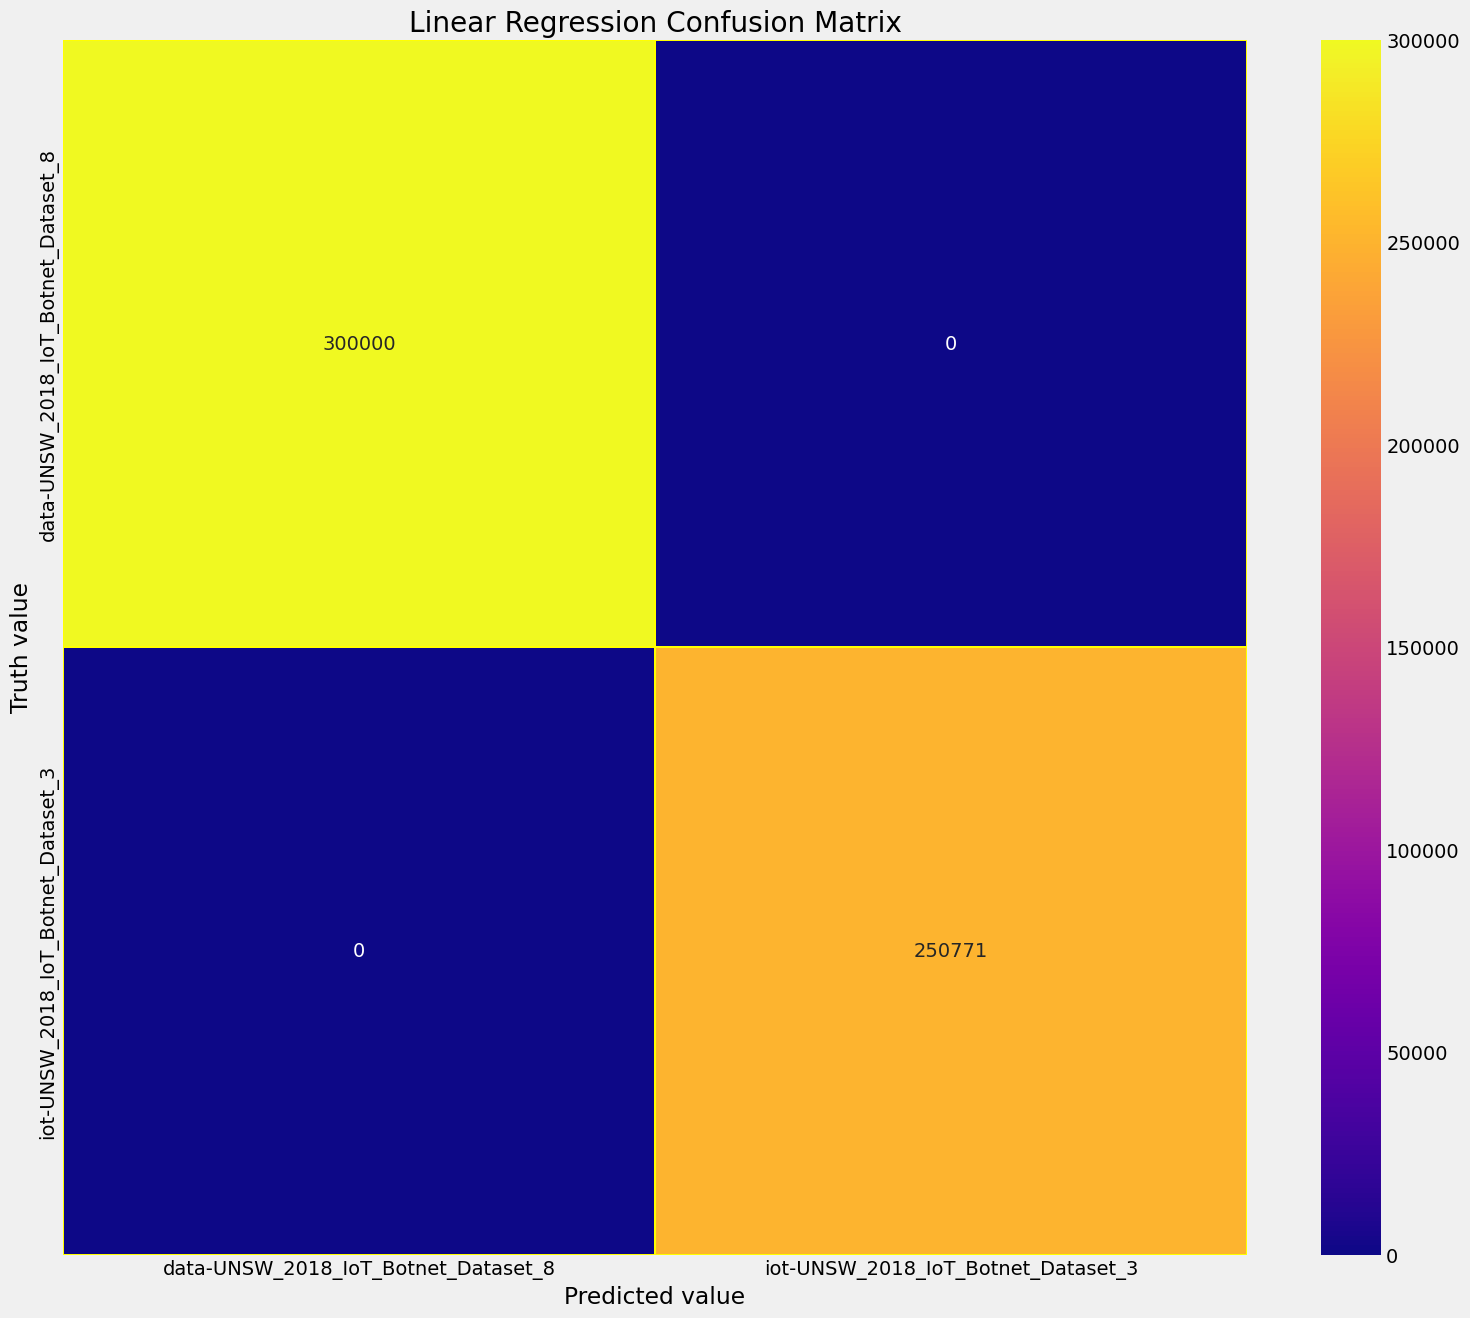

In [134]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="plasma")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Linear Regression Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [135]:
svc = SVC(gamma='auto', max_iter=1000)  # Set max_iter to a reasonable number

In [136]:
svc.fit(x_train_fs,y_train)

SVC(gamma='auto', max_iter=1000)

In [137]:
yhat = svc.predict(x_test_fs)

In [138]:
svm_accuracy = accuracy_score(y_test, yhat)*100
print('Accuracy: %.2f' % (svm_accuracy))

Accuracy: 100.00


In [139]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                                     precision    recall  f1-score   support

data-UNSW_2018_IoT_Botnet_Dataset_8       1.00      1.00      1.00    300000
 iot-UNSW_2018_IoT_Botnet_Dataset_3       1.00      1.00      1.00    250771

                           accuracy                           1.00    550771
                          macro avg       1.00      1.00      1.00    550771
                       weighted avg       1.00      1.00      1.00    550771



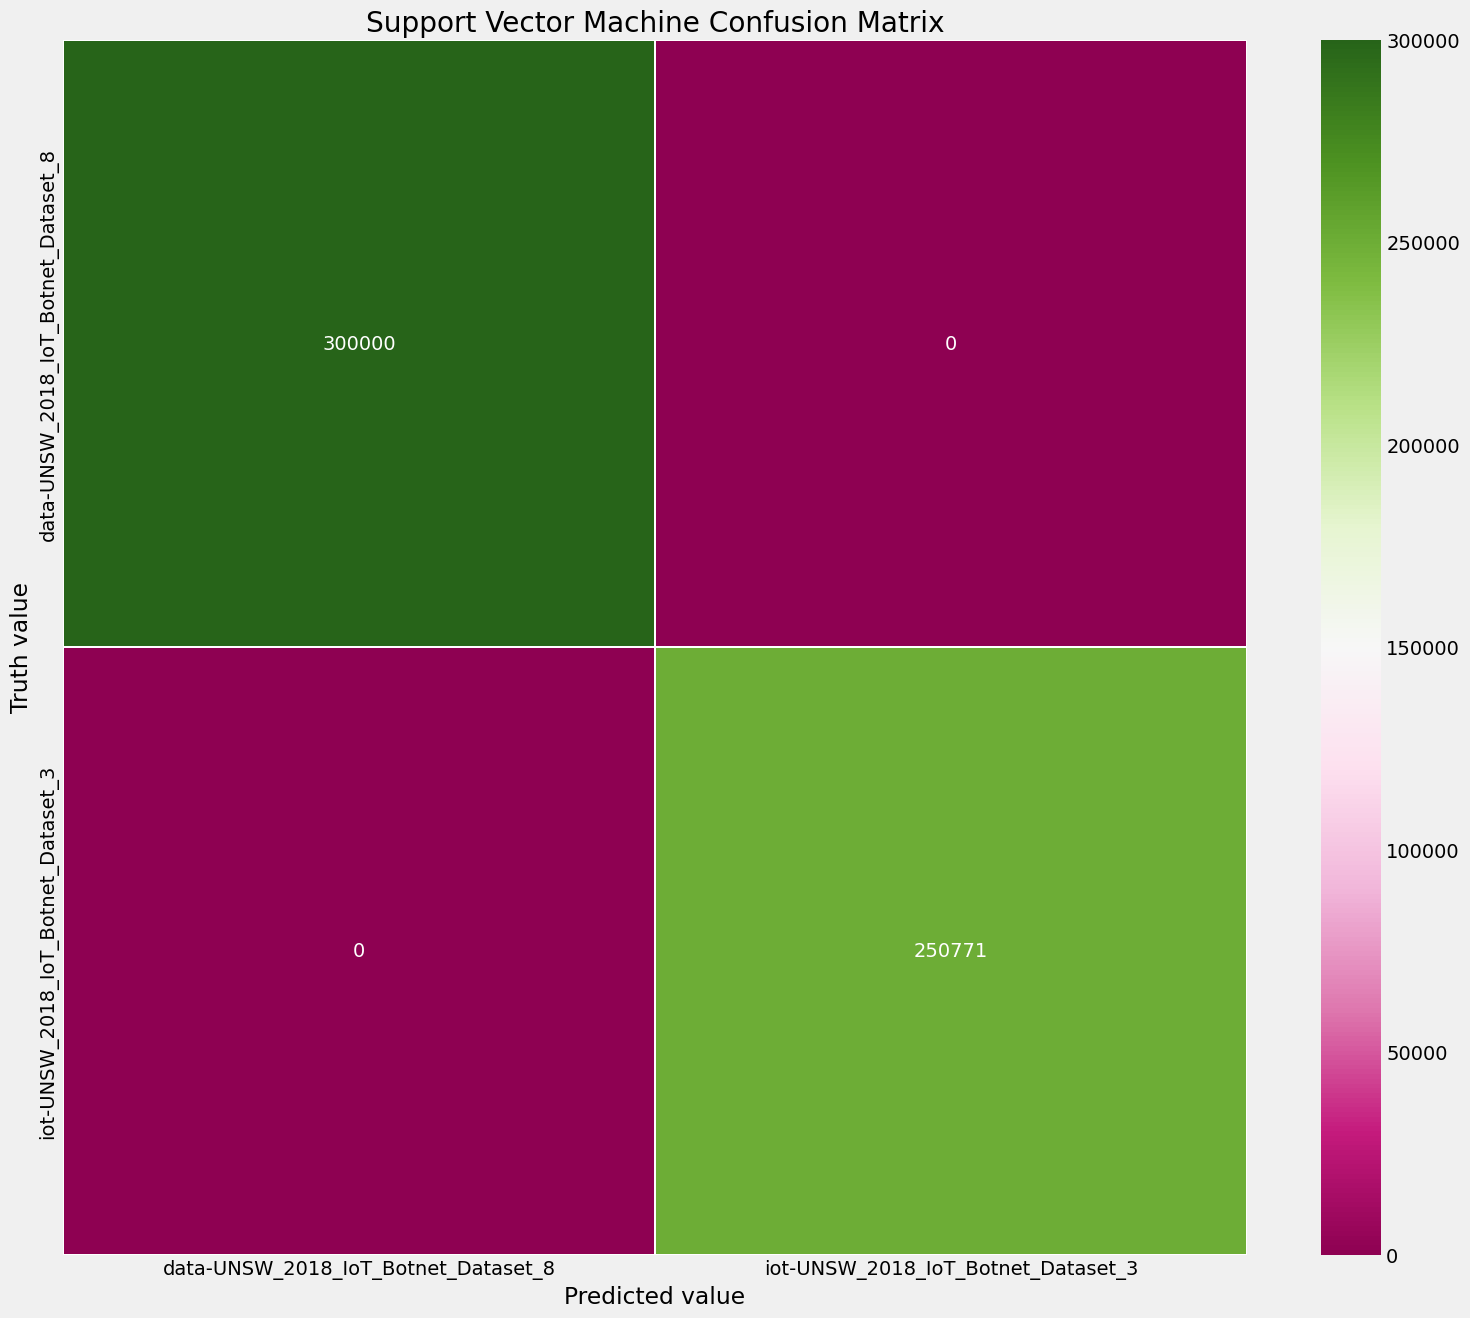

In [140]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PiYG")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Support Vector Machine Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [141]:
rf = RandomForestClassifier(n_estimators=50)

In [142]:
rf.fit(x_train_fs, y_train)

RandomForestClassifier(n_estimators=50)

In [143]:
yhat = rf.predict(x_test_fs)

In [144]:
rf_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (rf_accuracy))

Accuracy: 100.00


In [145]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                                     precision    recall  f1-score   support

data-UNSW_2018_IoT_Botnet_Dataset_8       1.00      1.00      1.00    300000
 iot-UNSW_2018_IoT_Botnet_Dataset_3       1.00      1.00      1.00    250771

                           accuracy                           1.00    550771
                          macro avg       1.00      1.00      1.00    550771
                       weighted avg       1.00      1.00      1.00    550771



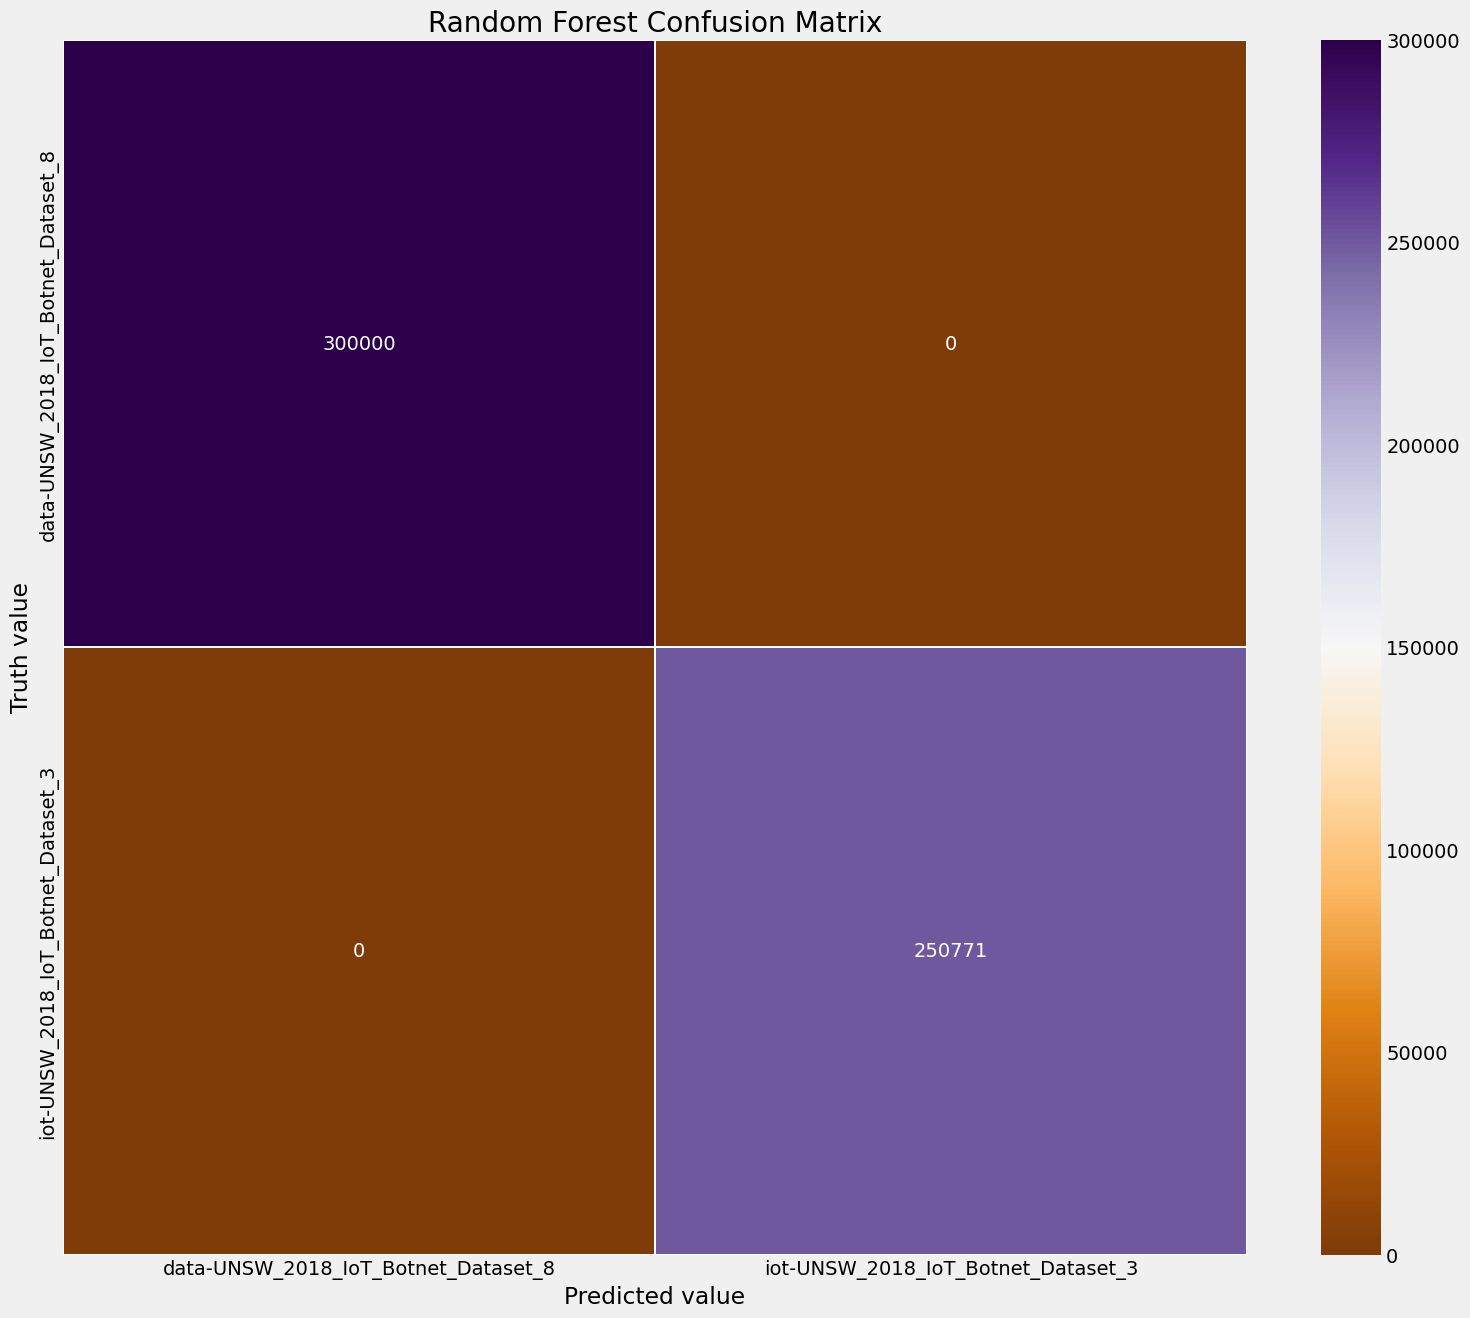

In [146]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PuOr")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [147]:
labels_full=pd.get_dummies(sub_attack_opt3_df['target'], prefix='type')

In [148]:
labels=labels_full.values
labels

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [149]:
labels.shape[1], y_test.shape

(2, (550771,))

In [150]:
x_train_fs.shape[1]

20

In [151]:
y_train,y_test

(326250    1
 36560     0
 267162    0
 328898    0
 632758    1
          ..
 309056    0
 737797    1
 624218    0
 622911    0
 987300    0
 Name: target, Length: 1285132, dtype: int32,
 524703    0
 82533     1
 452181    1
 721393    0
 334991    1
          ..
 972473    0
 863339    0
 667460    0
 303030    1
 304523    0
 Name: target, Length: 550771, dtype: int32)

In [152]:
y_train = to_categorical(y_train, len(labelencoder.classes_))
y_test_dl = to_categorical(y_test, len(labelencoder.classes_))

In [153]:
y_test_dl

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [154]:
x_train_fs

array([[5.59039545e-02, 3.72771476e-02, 2.30075532e-01, ...,
        3.76997603e-04, 4.80372030e-07, 1.00000000e+00],
       [8.34911724e-01, 8.37115073e-01, 7.15983825e-01, ...,
        2.61960954e-04, 0.00000000e+00, 1.00000000e+00],
       [8.74426096e-01, 8.85737439e-01, 5.68215457e-01, ...,
        5.81605981e-04, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.35608754e-01, 9.40032415e-01, 7.77737087e-01, ...,
        3.51984723e-04, 0.00000000e+00, 1.00000000e+00],
       [9.35384796e-01, 9.40032415e-01, 2.73670558e-01, ...,
        4.74480032e-04, 5.03832031e-07, 1.00000000e+00],
       [9.97823987e-01, 9.96758509e-01, 9.86968795e-01, ...,
        4.66411118e-04, 4.95264031e-07, 1.00000000e+00]])

In [155]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [156]:
ann_model = create_nn_model()

In [157]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam')

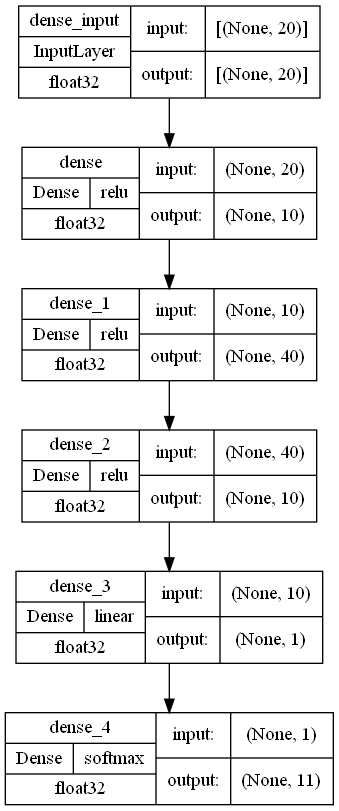

In [149]:
plot_model(ann_model,to_file="ann_nn_architecture.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

In [158]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto')

In [159]:
ann_model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
40161/40161 - 65s - 2ms/step - loss: 0.0018 - val_loss: 2.1644e-12
Epoch 2/500
40161/40161 - 81s - 2ms/step - loss: 2.3190e-12 - val_loss: 6.4932e-13
Epoch 3/500
40161/40161 - 105s - 3ms/step - loss: 1.0204e-12 - val_loss: 2.1644e-13
Epoch 4/500
40161/40161 - 114s - 3ms/step - loss: 5.5656e-13 - val_loss: 2.1644e-13
Epoch 5/500
40161/40161 - 105s - 3ms/step - loss: 4.6380e-13 - val_loss: 2.1644e-13
Epoch 6/500
40161/40161 - 89s - 2ms/step - loss: 3.7104e-13 - val_loss: 0.0000e+00
Epoch 6: early stopping


In [160]:
x_test.shape

(550771, 22)

In [161]:
y_pred = ann_model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model1_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model1_accuracy))

17212/17212 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
accuracy: 100.0


In [162]:
x_train_fs[0]

array([5.59039545e-02, 3.72771476e-02, 2.30075532e-01, 1.23787272e-03,
       7.91217486e-04, 7.63213050e-05, 7.26698262e-02, 4.04747193e-01,
       7.87159561e-01, 3.00359952e-02, 6.26945148e-03, 7.03009083e-03,
       2.91481705e-02, 3.25355110e-02, 9.89119683e-04, 1.14440706e-04,
       4.02129756e-04, 3.76997603e-04, 4.80372030e-07, 1.00000000e+00])

In [163]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                                     precision    recall  f1-score   support

data-UNSW_2018_IoT_Botnet_Dataset_8       1.00      1.00      1.00    300000
 iot-UNSW_2018_IoT_Botnet_Dataset_3       1.00      1.00      1.00    250771

                           accuracy                           1.00    550771
                          macro avg       1.00      1.00      1.00    550771
                       weighted avg       1.00      1.00      1.00    550771



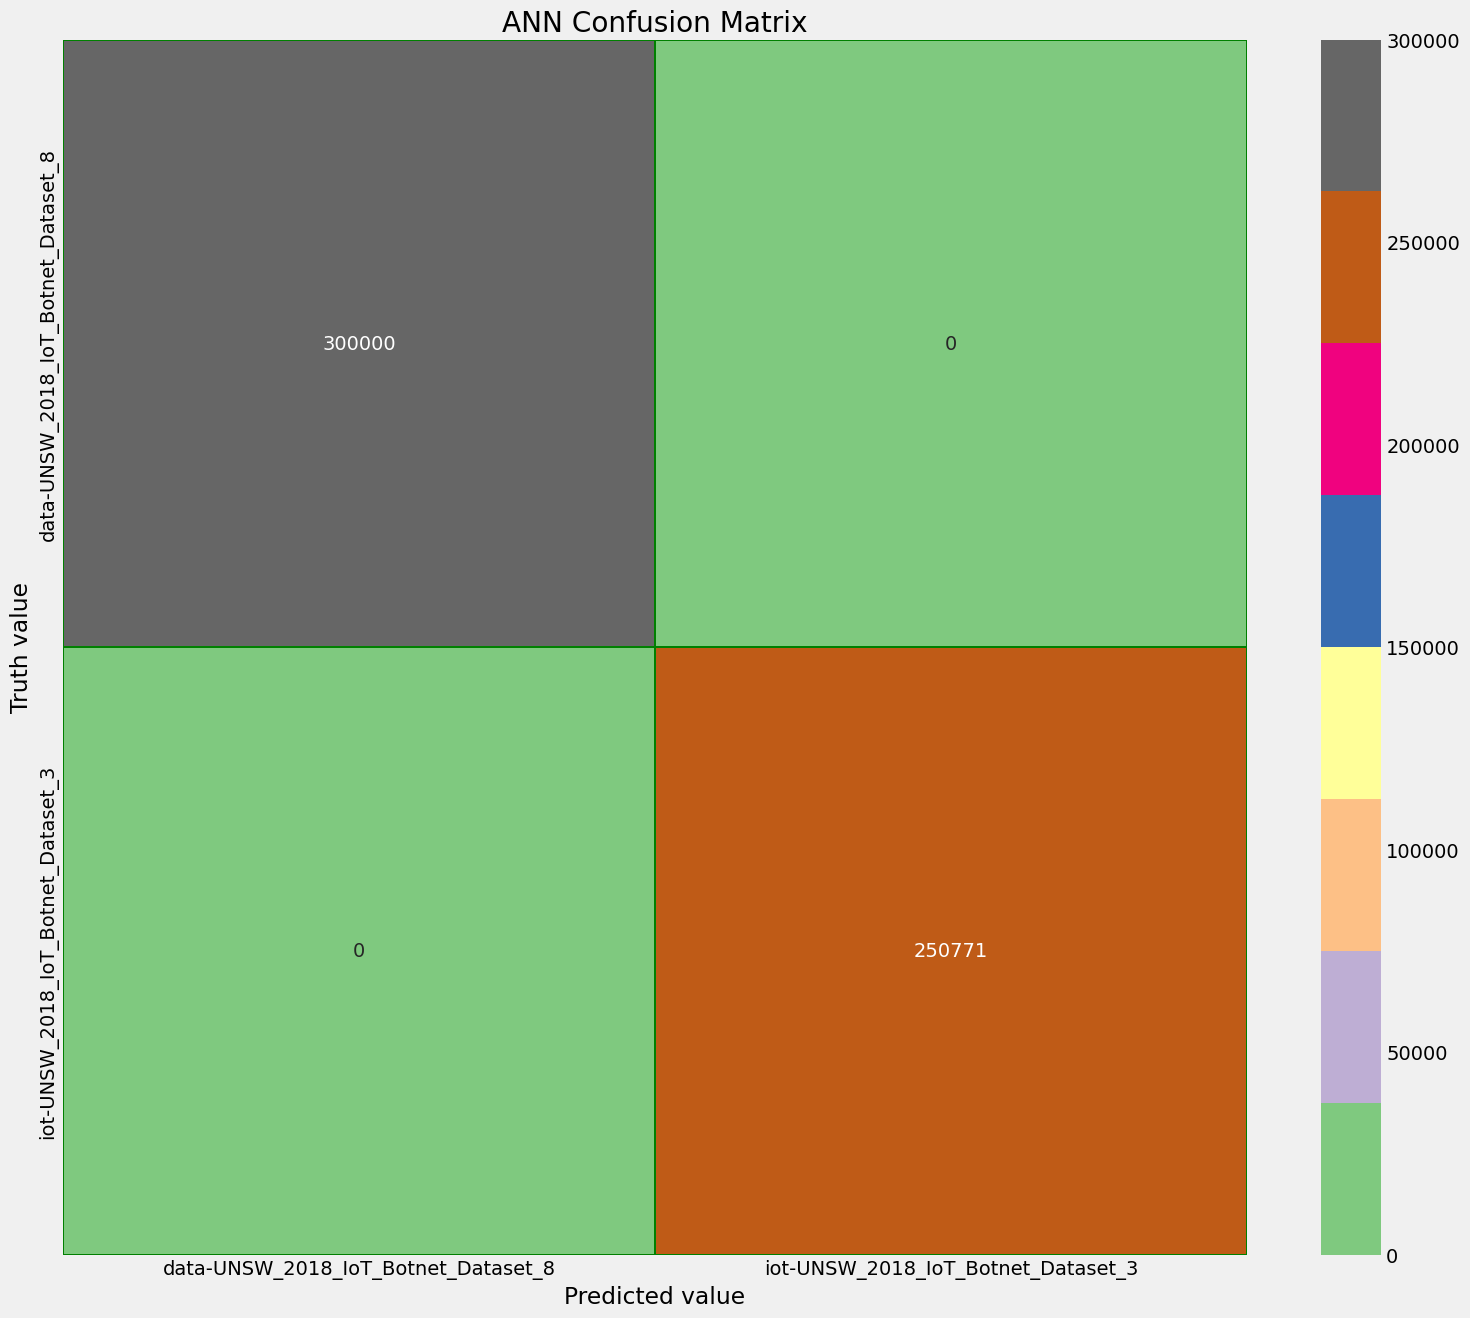

In [164]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='green', ax=ax, cmap="Accent")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('ANN Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [165]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (x_train_fs.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(LSTM(32, activation = 'relu', return_sequences=True))
    model.add(LSTM(16, return_sequences=True))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [166]:
model = create_cnn_lstm_model()

In [167]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

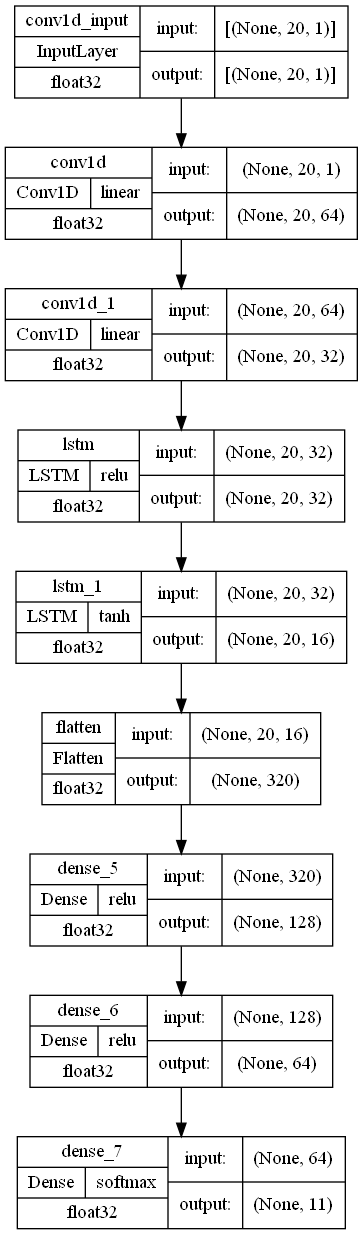

In [160]:
plot_model(model,to_file="cnn-lstm.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

In [168]:
model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500


In [156]:
y_pred = model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

9547/9547 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step
accuracy: 83.62794199482798


In [157]:
y_test_dl.argmax(axis=1)

array([1, 9, 5, ..., 7, 5, 9], dtype=int64)

In [158]:
y_pred

array([2, 9, 5, ..., 7, 5, 9], dtype=int64)

In [ ]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

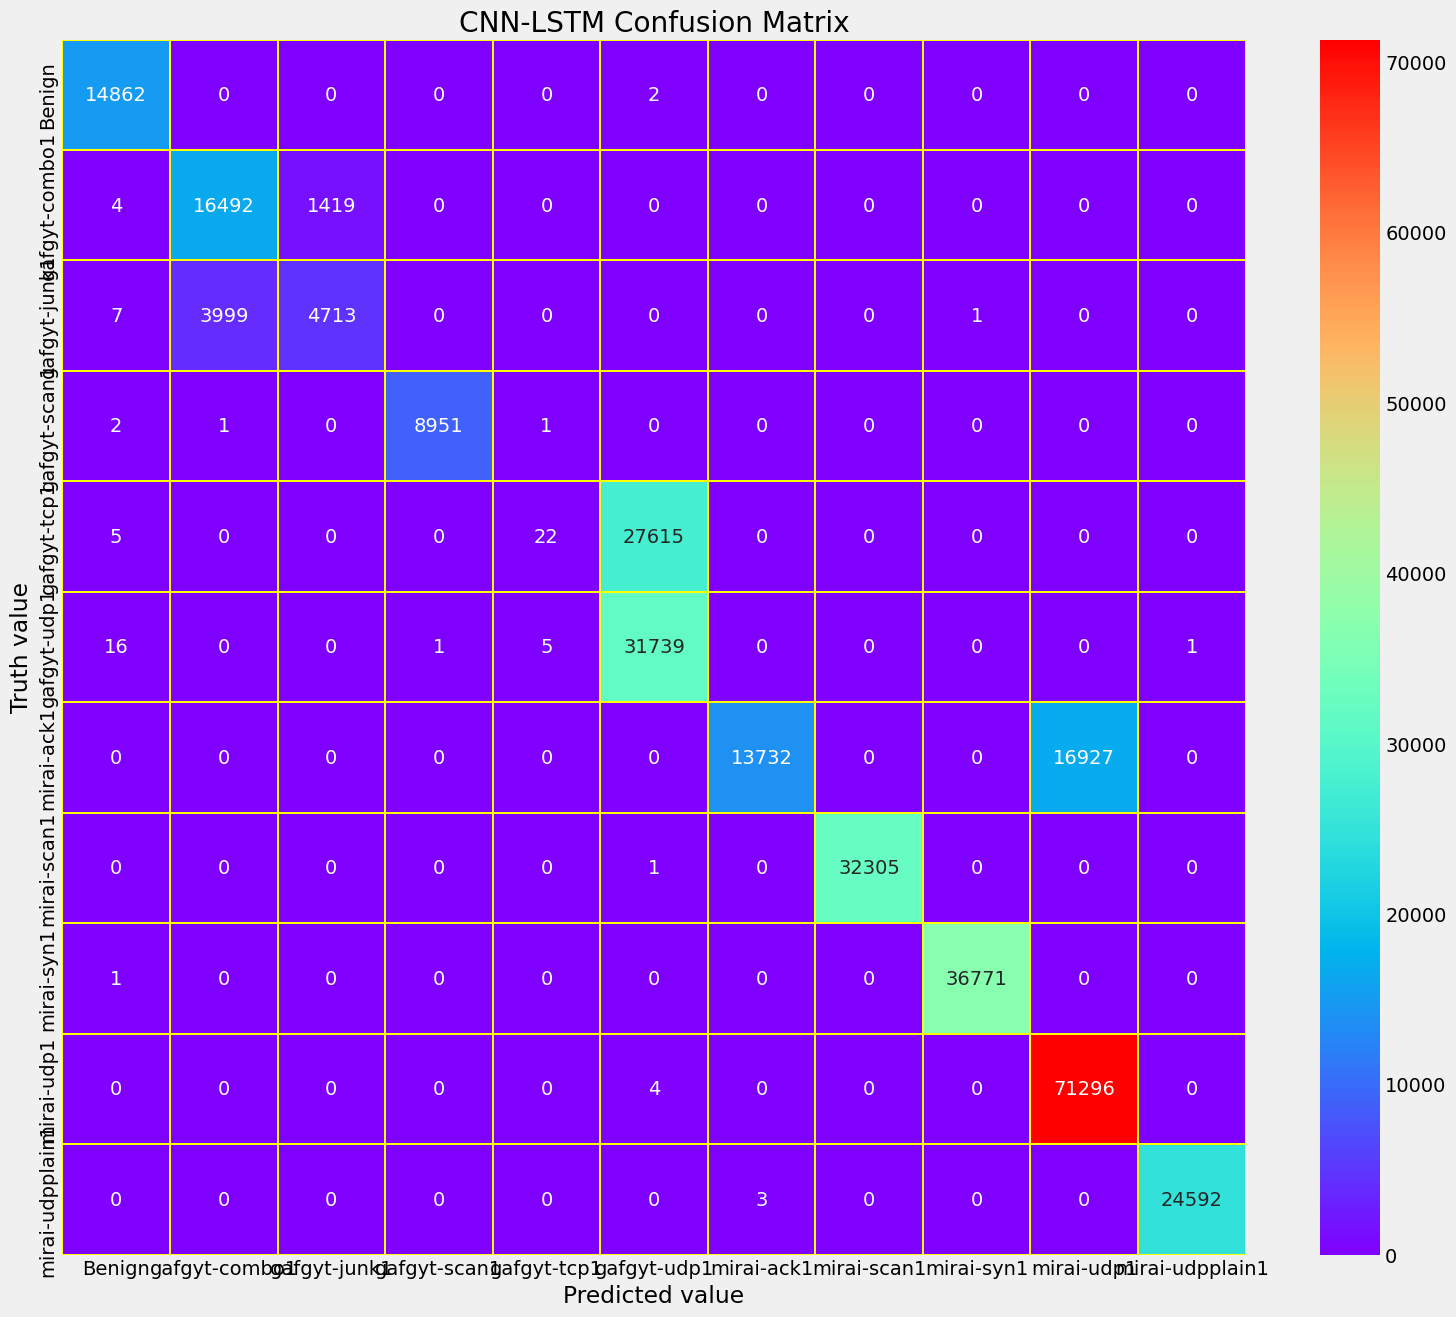

In [160]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="rainbow")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('CNN-LSTM Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [161]:
accuracy_avg = (lr_accuracy + rf_accuracy + svm_accuracy + nn_model1_accuracy + nn_model2_accuracy) / 5

In [163]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))

In [162]:
from sklearn.decomposition import PCA

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [188]:
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [189]:
lr_cls = LogisticRegression(solver='liblinear', C=0.2)
lr_cls.fit(x_train_pca, y_train)
yhat_lr = lr_cls.predict(x_test_pca)
lr_accuracy = accuracy_score(y_test, yhat_lr) * 100
print('Logistic Regression Accuracy: %.2f' % lr_accuracy)


Logistic Regression Accuracy: 84.99


In [166]:
# SVM
svc = SVC(gamma='scale', max_iter=1000, C=1.0)
svc.fit(x_train_pca, y_train)
yhat_svc = svc.predict(x_test_pca)
svm_accuracy = accuracy_score(y_test, yhat_svc) * 100
print('SVM Accuracy: %.2f' % svm_accuracy)

SVM Accuracy: 83.26


In [190]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train_pca, y_train)
yhat_rf = rf.predict(x_test_pca)
rf_accuracy = accuracy_score(y_test, yhat_rf) * 100
print('Random Forest Accuracy: %.2f' % rf_accuracy)

Random Forest Accuracy: 90.46


In [168]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
# Neural Network
y_train_dl = to_categorical(y_train, len(labelencoder.classes_))
y_test_dl = to_categorical(y_test, len(labelencoder.classes_))

In [183]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_pca.shape[1], activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1], activation='softmax'))
    return model

In [191]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=x_train_pca.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(labels.shape[1], activation='softmax'))
    return model

In [192]:
ann_model = create_nn_model()
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
# Train the NN model
ann_model.fit(x_train_pca, y_train_dl, epochs=15, batch_size=20, verbose=0)

In [186]:
# Evaluate the NN model
_, nn_model_accuracy = ann_model.evaluate(x_test_pca, y_test_dl, verbose=0)
nn_model_accuracy *= 100
print('Neural Network Accuracy: %.2f' % nn_model_accuracy)

Neural Network Accuracy: 89.06


In [194]:
y_pred = ann_model.predict(x_test_pca)

9547/9547 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [176]:
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

accuracy: 90.4245638155095


In [187]:
# Calculate average accuracy
accuracy_avg = (lr_accuracy + rf_accuracy + svm_accuracy + nn_model_accuracy) / 4
print('Average Accuracy using PCA: %.2f' % accuracy_avg)

Average Accuracy using PCA: 87.21


In [195]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))